<center>
    <h1>LDA Explanation Demonstration</h1>
</center>
<br>

This notebook is available [here](https://ellros.github.io/LDA-Explanation-docs/demo/demo.ipynb) and its purpose is to demonstrate the functionality of the class `LDA_Explainer`. For further details, see the [API documentation](https://ellros.github.io/LDA-Explanation-docs/).

In [1]:
from LDA_Explanation.lda_explainer import LDA_Explainer

## Read the data and model confidence

The data is taken from [CausaLM Datasets](https://www.kaggle.com/amirfeder/causalm) and the confidence was calculated using a BERT classifier from [Trasformers](https://github.com/huggingface/transformers) for sentiment classification.

The specific csv file we use is available [here](https://github.com/EllRos/LDA-Explanation/blob/main/docs/demo/reviews_with_confidence.csv).

This data is ruled by domains (reviews for movies, books, electronics and kitchen products), but the module works the same without domains given (try passing `domain_labels = None` at initialization). The last domain (DVD) is dropped since it is too similar to the first (movies).

In [2]:
import pandas as pd  # For presenting the data, not necessary.

df = pd.read_csv('reviews_with_confidence.csv')
df = df[df['domain_label'] != 4]
df

,domain_label,review,sentiment_label,confidence
0,0,Worst pile of drivel to date ! Everyone involv...,0,0.048275
1,0,I do n't even understand what they tried to ac...,0,0.002612
2,0,"Two years after this movie was made , "" The Ju...",0,0.005946
3,0,"I loved the first movie , the second one was o...",0,0.286935
4,0,I watched 5 % of this movie tonight and you ma...,0,0.033842
...,...,...,...,...
8723,3,Great little steamer ; this HS900 model is onl...,1,0.961322
8724,3,Makes The Best Coffee I have owned at least si...,1,0.863748
8725,3,Excellent product and excellent product suppor...,1,0.986386
8726,3,"Does the job A fork is a fork , right ? This d...",1,0.854980


## Fit an LDA_Explainer to the model

In [3]:
explainer = LDA_Explainer(num_topics = 30).fit(texts = df['review'],
                                               model_confidence = df['confidence'],
                                               domain_labels = df['domain_label'],
                                               domain_names = ['Movies', 'Books', 'Electronics', 'Kitchen']
                                              )

## Save or load an LDA_Explainer

In [4]:
# explainer.save('./saved_models/lda30')  # Creates multiple files in "./saved_models/" with the prefix "lda30".

explainer = LDA_Explainer.load('./saved_models/lda30')

## Display the topics

Highlighted are topics that seem to represent the domains. <br>
Highlighting is manual and was made specifically for this model. Fitting a new model will result in different topics.

In [5]:
explainer.display_topics(topn = 13,  # 13 to fit nicely in a webpage
                         colors = {  # Manual coloring
                             'red': [2, 14],     # Movies
                             'green': [10, 16],  # Books
                             'blue': [4, 8, 9],  # Electronics
                             'purple': [3, 21]   # Kitchen
                         }
                        )

,1,2,3,4,5,6,7,8,9,10,11,12,13
topic #1,pan,use,great,ipod,pans,time,like,set,love,heat,case,nice,easy
topic #2,film,movie,story,great,good,like,bad,best,love,films,little,seen,filters
topic #3,coffee,cup,cooker,maker,timer,kitchen,hot,counter,appliance,time,pot,carafe,use
topic #4,player,sound,good,bought,use,great,ipod,worked,problem,dvd,works,quality,mp3
topic #5,book,film,time,like,great,movie,people,good,world,way,love,author,think
topic #6,ice,book,printer,cartridges,use,great,good,oxo,work,like,dishes,got,instruction
topic #7,movie,time,wine,film,like,great,recipes,watch,good,way,book,best,chinese
topic #8,card,like,good,work,memory,garmin,signal,cards,movie,clip,bought,transfer,use
topic #9,product,great,quality,phone,good,price,sound,buy,use,work,mouse,cable,better
topic #10,book,like,movie,good,read,people,time,way,little,love,great,life,think


## Display the separating topics

For each domain $d$ (and all domains), we choose the separating topic $z^d$ that maximizes
$$
    z^d = \arg\max_{z \in Z} \left| \sum_{i \in I^d} \hat{y}_i \theta_z^i \right|
$$
Where $Z$ is the set of all topics, $I^d$ is the set of documents belonging to the domain $d$, $\hat{y}_i$ is the prediction of the explained model ($1$ or $-1$) and $\theta_z^i$ is the probability (dominance) of topic $z$ in document $i$.

This measure is meant to encapsulate the separating ability of the topics (i.e., how much the presence of the topic in the document affects the prediction).

The `score` values in the following table is the score of the separating topic with its sign, i.e., $\sum_{i \in I^d} \hat{y}_i \theta_{z^d}^i$.

In [6]:
explainer.display_seperating_topics(topn = 15)

,#,score,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
All,29,162.469,use,great,easy,good,water,quality,set,size,book,food,little,price,product,knives,large
Movies,14,-59.4849,movie,like,good,film,think,people,time,love,best,actually,story,way,characters,little,great
Books,5,40.2279,book,film,time,like,great,movie,people,good,world,way,love,author,think,know,children
Electronics,4,-43.1907,player,sound,good,bought,use,great,ipod,worked,problem,dvd,works,quality,mp3,support,time
Kitchen,29,102.462,use,great,easy,good,water,quality,set,size,book,food,little,price,product,knives,large


## Plot model confidence vs. separating topic probability for each domain

As in Reichart et al. 2020 (see documentation), for each topic probability $j \in \{0.1, 0.2, ..., 1\}$, the confidence is averaged over $\big\{i \in I^d : \theta^i_{z^d} \in (j - 0.1, j]\big\}$.

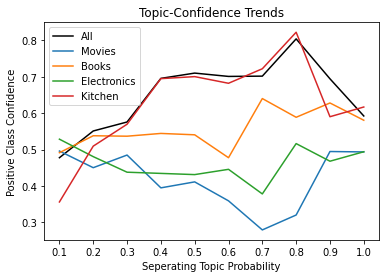

In [7]:
figure = explainer.plot_topic_confidence_trends()

## Plot topic dominance (probability) in each domain, for all topics

Just cause.

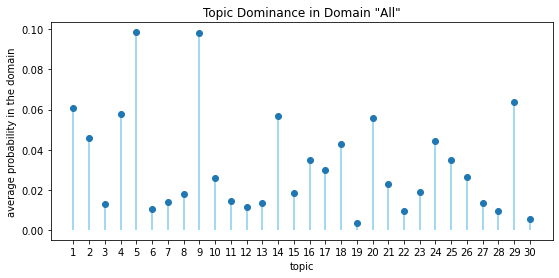

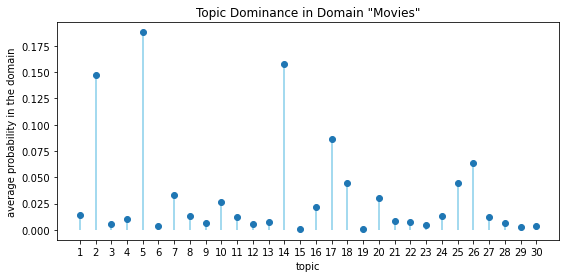

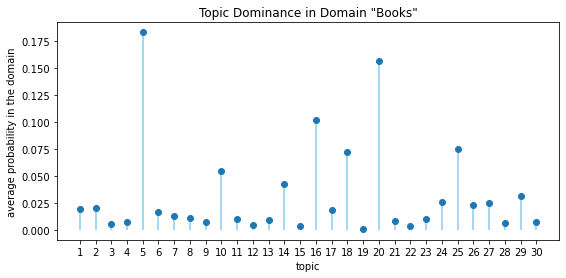

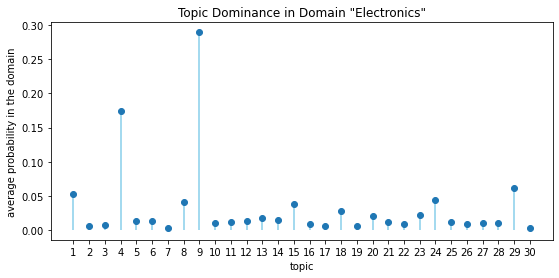

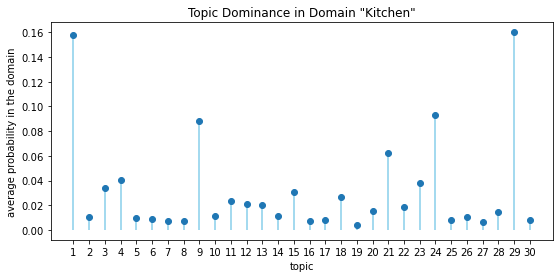

In [8]:
figures = explainer.plot_topics_dominance()